In [4]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
try:
    import pandasql as ps
except:
    os.system("pip install pandasql")

In [5]:
df = pd.read_csv('iris.csv')
print(type(df))
#df.head(10)

<class 'pandas.core.frame.DataFrame'>


### Gets a list of available datasets from Internet

In [14]:
#sns.get_dataset_names()

In [11]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
titanic = sns.load_dataset('titanic')
#titanic.head()

In [8]:
tips = sns.load_dataset('tips')

In [20]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [22]:
tips.sex.unique()

['Female', 'Male']
Categories (2, object): ['Female', 'Male']

In [23]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Using SQL

In [25]:
sql = "select sex, avg(tip) from tips where sex = 'Female'"
df = ps.sqldf(sql)
df

,sex,avg(tip)
0,Female,2.833448


In [27]:
sql = "select sex, count(*), avg(tip) from tips group by sex"
print(ps.sqldf(sql))

      sex  count(*)  avg(tip)
0  Female        87  2.833448
1    Male       157  3.089618


## Using Pandas Syntax

In [28]:
print(tips['tip'].mean())

2.99827868852459


In [29]:
print(tips[tips['sex']=='Female']['tip'].mean())

2.8334482758620685


In [30]:
df=tips[tips['sex']=='Female']
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
11        35.26  5.00  Female     No   Sun  Dinner     4
14        14.83  3.02  Female     No   Sun  Dinner     2
16        10.33  1.67  Female     No   Sun  Dinner     3
..          ...   ...     ...    ...   ...     ...   ...
226       10.09  2.00  Female    Yes   Fri   Lunch     2
229       22.12  2.88  Female    Yes   Sat  Dinner     2
238       35.83  4.67  Female     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[87 rows x 7 columns]


In [31]:
print(tips[tips['sex']=='Male']['tip'].mean())

3.0896178343949043


## Smoker vs. Non-Smokers

In [9]:
sql = "select smoker, avg(tip), count(*) from tips group by smoker"
print(ps.sqldf(sql))

  smoker  avg(tip)  count(*)
0     No  2.991854       151
1    Yes  3.008710        93


In [10]:
print(tips.groupby(['smoker']).count())
tips.groupby(['smoker']).mean()

        total_bill  tip  sex  day  time  size
smoker                                       
Yes             93   93   93   93    93    93
No             151  151  151  151   151   151


,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


## Dinner vs. Lunch

In [11]:
sql = "select time, avg(tip), count(*) from tips group by time"
print(ps.sqldf(sql))

     time  avg(tip)  count(*)
0  Dinner  3.102670       176
1   Lunch  2.728088        68


## Group By Using Pandas with More than One Attributes

In [12]:
tips.groupby(['sex', 'smoker', 'time']).mean()

total_bill       tip      size
sex    smoker time                                  
Male   Yes    Lunch    17.374615  2.790769  2.153846
              Dinner   23.642553  3.123191  2.595745
       No     Lunch    18.486500  2.941500  2.500000
              Dinner   20.130130  3.158052  2.766234
Female Yes    Lunch    17.431000  2.891000  2.300000
              Dinner   18.215652  2.949130  2.217391
       No     Lunch    15.902400  2.459600  2.520000
              Dinner   20.004138  3.044138  2.655172

In [18]:
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

## Plots with Pandas

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

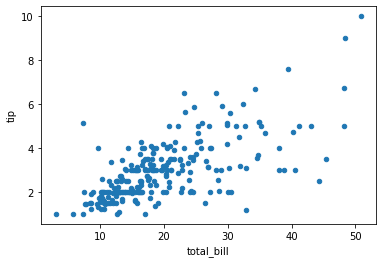

In [21]:
tips.plot.scatter(x='total_bill', y='tip')

array([<AxesSubplot:title={'center':'Male'}>,
       <AxesSubplot:title={'center':'Female'}>], dtype=object)

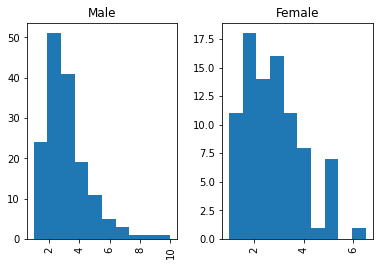

In [23]:
tips['tip'].hist(by=tips['sex'])

### Correlation

In [24]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## What is the Average Tips of the Total Bill?

### First we need to make this new column

In [25]:
tips['percent'] = tips['tip']/tips['total_bill']

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [27]:
tips.percent.mean()

0.16080258172250472

In [29]:
tips.groupby(['sex'])['percent'].mean()

sex
Male      0.157651
Female    0.166491
Name: percent, dtype: float64

### Females tip more generously while they pay less in absolute dollars. Why?

### Would it be because males spend more in dinner or lunch?

In [31]:
tips.groupby(['sex'])['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

## Missign data and outliers?

In [32]:
tips2 = pd.read_csv('tips2.csv')
tips2['percent'] = tips2['tip'] /tips2['total_bill']

In [33]:
tips2.groupby(['sex'])['tip'].mean()

sex
Female    3.206897
Male      3.082722
Name: tip, dtype: float64

In [34]:
tips2.groupby(['sex'])['percent'].mean()

sex
Female    0.181678
Male      0.157651
Name: percent, dtype: float64

In [35]:
tips2.isnull().any()

total_bill     True
tip           False
sex           False
smoker        False
day           False
time          False
size          False
percent        True
dtype: bool

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

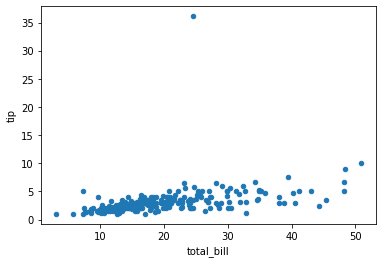

In [36]:
tips2.plot.scatter(x='total_bill', y='tip')

## Other way to check for outliers

In [37]:
tips2.tip.describe()

count    245.000000
mean       3.126816
std        2.526508
min        1.000000
25%        2.000000
50%        2.880000
75%        3.550000
max       36.100000
Name: tip, dtype: float64

<AxesSubplot:xlabel='tip'>

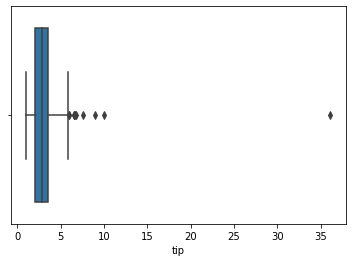

In [38]:
sns.boxplot(x=tips2['tip'])

## Remove Outliers and Nulls

In [40]:
print(tips2.shape)
tips2.dropna(inplace=True)
print(tips2.shape)

(245, 8)
(244, 8)


In [41]:
tips2[tips2.percent > 0.6]

,total_bill,tip,sex,smoker,day,time,size,percent
4,24.59,36.10,Female,No,Sun,Dinner,4,1.468076
173,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [42]:
tips2 = tips2[tips2.percent < 0.8]
tips2.shape

(243, 8)

## Now Data Shows Females Paying a Lower Tip Amount

In [43]:
tips2.groupby(['sex'])['tip'].mean()

sex
Female    2.824419
Male      3.089618
Name: tip, dtype: float64

In [44]:
tips2.groupby(['sex'])['percent'].mean()

sex
Female    0.166720
Male      0.157651
Name: percent, dtype: float64